# 🌸 Iris Flower Classification Project

This notebook classifies iris flower species based on petal and sepal measurements using Logistic Regression and Decision Tree algorithms.


## 1️⃣ Import Libraries

Importing essential Python libraries for data analysis, visualization, and machine learning.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2️⃣ Data Loading

Loading the Iris dataset and checking its structure.


In [2]:
df = pd.read_csv("iris.csv")

In [3]:
print(df.shape)

(150, 5)


In [4]:
print(df.head(10))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


Checking for the missing values

In [5]:
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

## 3️⃣ Exploratory Data Analysis (EDA)

Let's explore the data using counts, pairplots, and histograms to understand feature relationships and class balance.


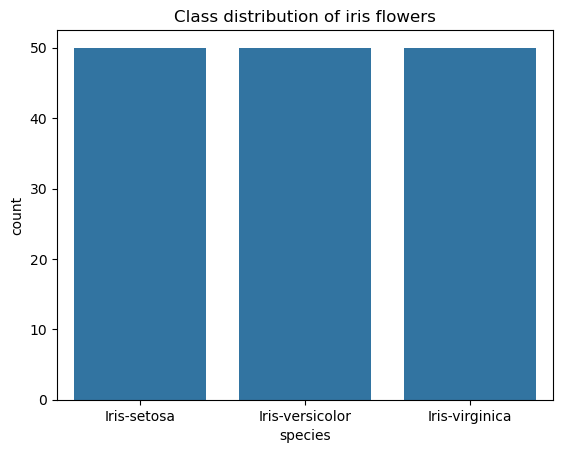

In [7]:
sns.countplot(x="species",data=df)
plt.title("Class distribution of iris flowers")
plt.show()

- The pairplot shows clear separation for Setosa.
- Some overlap between Versicolor and Virginica.
- Petal features appear most discriminative.


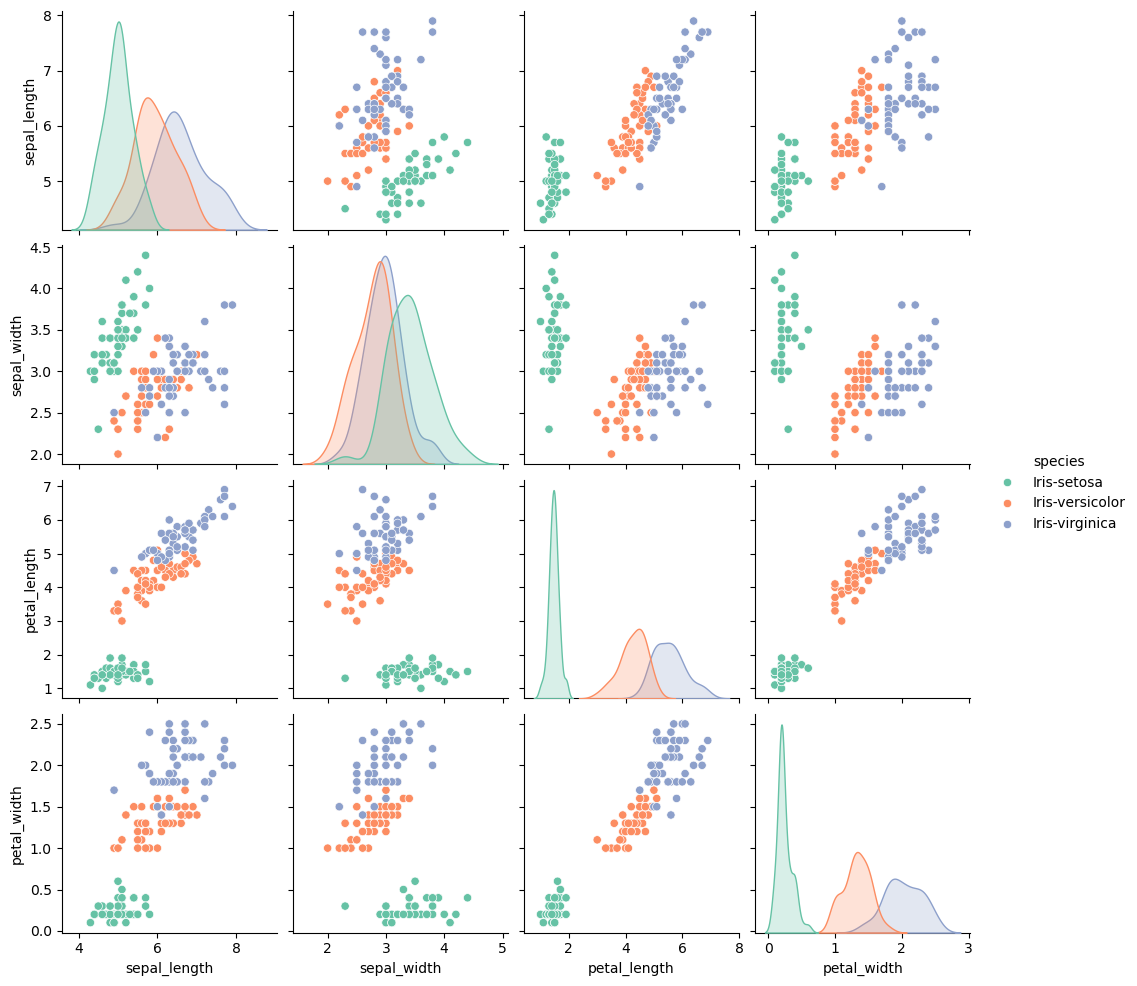

In [8]:
sns.pairplot(df, hue="species", palette="Set2")
plt.show()

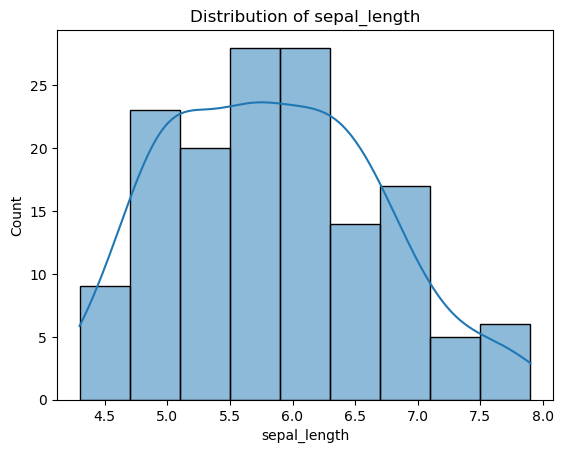

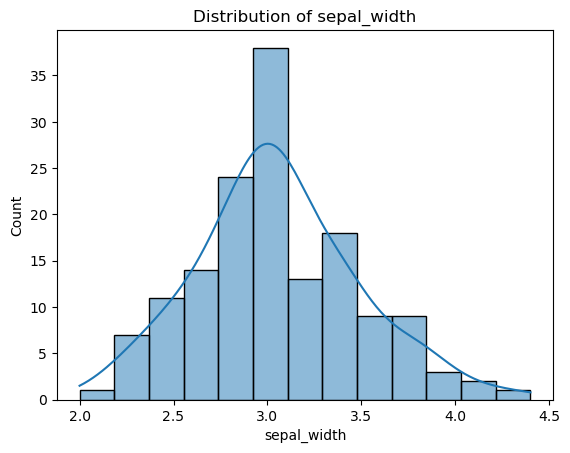

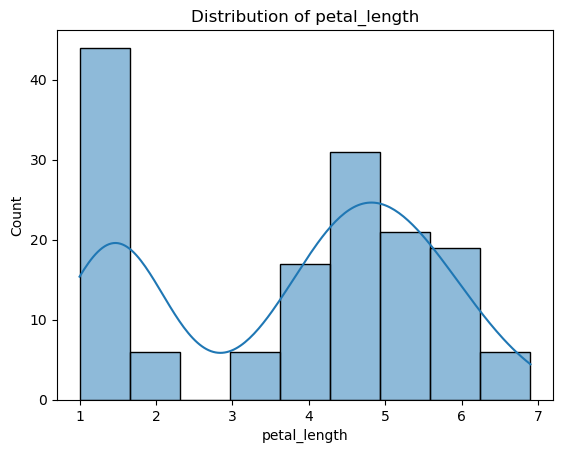

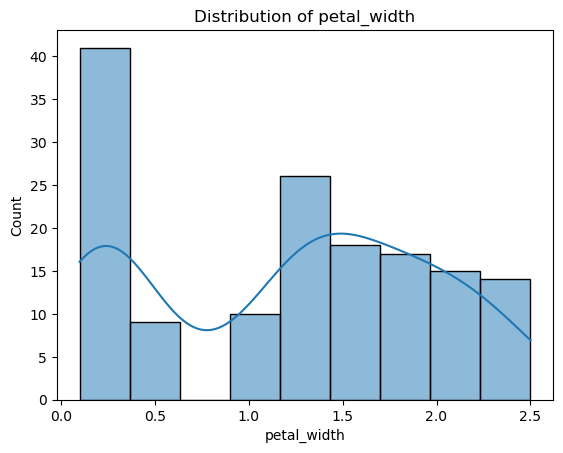

In [9]:
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
for col in features:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

## 4️⃣ Data Preprocessing

Encoding target labels to numeric classes for model training, and splitting into training and testing sets.


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["species"] = encoder.fit_transform(df["species"])
print(df["species"].value_counts())

species
0    50
1    50
2    50
Name: count, dtype: int64


- 80% data used for training
- 20% held out for testing
- stratify ensures balanced class distribution in both


In [11]:
features = df.drop("species",axis=1)
target = df["species"]

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(features,target,test_size = 0.2,random_state = 42,stratify=target)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
print("train data shape:",X_train_std.shape)
print("test data shape:",X_test_std.shape)
print("class count:",target.value_counts())

train data shape: (120, 4)
test data shape: (30, 4)
class count: species
0    50
1    50
2    50
Name: count, dtype: int64


In [12]:
df.head(8)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0


## 5️⃣ Model Building: Logistic Regression

We will start with a logistic regression baseline model using One-vs-Rest strategy.


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


In [14]:
L_model = LogisticRegression(max_iter=200)
L_model.fit(X_train_std,y_train)
y_pred_L = L_model.predict(X_test_std)


print("logistic regression accuracy:",accuracy_score(y_test,y_pred_L))

logistic regression accuracy: 0.9333333333333333


## 6️⃣ Model Building: Decision Tree

Now training a Decision Tree, which usually works well on this dataset because of clearly separable petal measurements.


In [15]:
T_model = DecisionTreeClassifier(random_state=1)
T_model.fit(X_train,y_train)
y_pred_T = T_model.predict(X_test)

print("decision tree accuracy:",accuracy_score(y_test,y_pred_T))

decision tree accuracy: 0.9666666666666667


In [16]:
confmat_lr = confusion_matrix(y_test , y_pred_L)
confmat_dt = confusion_matrix(y_test, y_pred_T)

print("logistic regression conf matrix:\n",confmat_lr)
print("decision tree conf matrix:\n",confmat_dt)

logistic regression conf matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
decision tree conf matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


## 7️⃣ Decision Tree Visualization

Visualizing the trained Decision Tree to see how it splits the features.

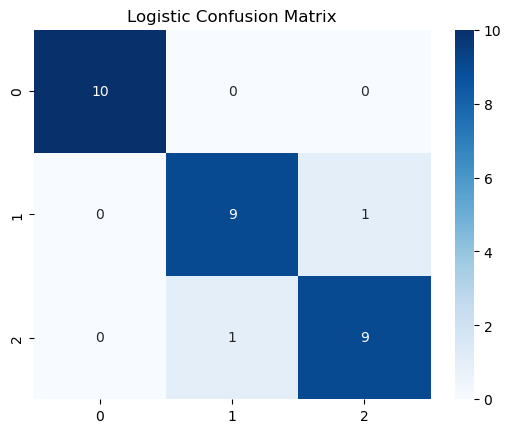

In [40]:
import seaborn as sns

sns.heatmap(confmat_lr, annot=True, cmap="Blues")
plt.title("Logistic Confusion Matrix")
plt.show()

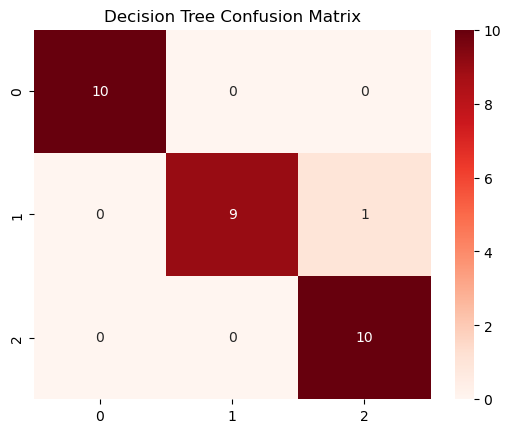

In [38]:
sns.heatmap(confmat_dt, annot=True, cmap="Reds")
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [19]:
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_L))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_T))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



- Petal length and petal width are the most significant features.
- Sepal features are less useful for classification in this dataset.


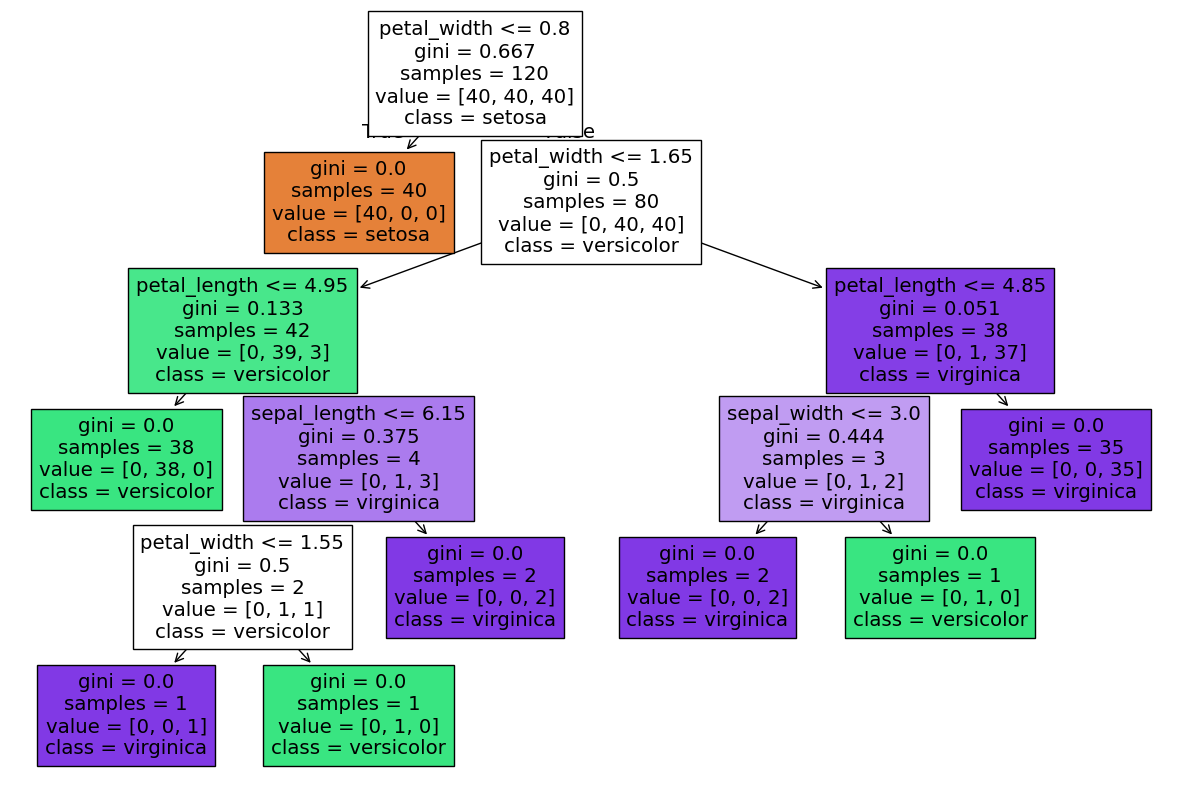

In [20]:
from sklearn import tree

plt.figure(figsize=(15, 10))
tree.plot_tree(T_model, filled=True, feature_names=features.columns, class_names =["setosa","versicolor","virginica"])
plt.show()


In [21]:
importances = T_model.feature_importances_
for name, val in zip(features.columns, importances):
    print(f"{name}: {val:.3f}")


sepal_length: 0.006
sepal_width: 0.017
petal_length: 0.059
petal_width: 0.919


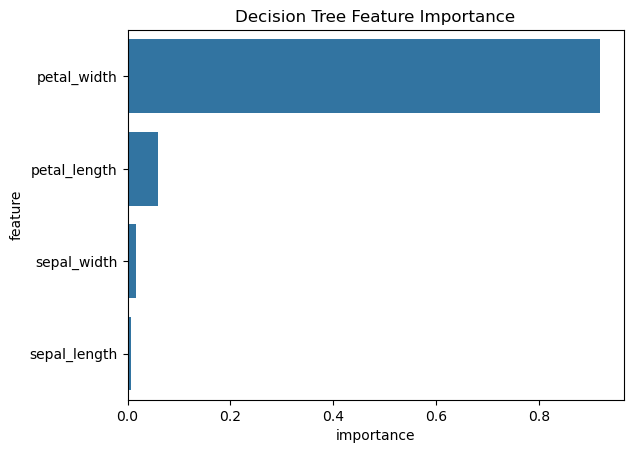

In [32]:
feat_df = pd.DataFrame({
    'feature': features.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feat_df)
plt.title("Decision Tree Feature Importance")
plt.show()


## 📝 Summary of Model Findings

1. Decision Tree achieved 97% accuracy on test set
2. Petal length and petal width were the strongest features to classify flowers
3. Logistic Regression worked well but was slightly worse due to simpler boundaries
4. Visualization of tree shows clear splitting on petal dimensions
